# Describe how to use opencv read from different resource

## We will demostrate how to read from
- image
- video
- stream

#### some explain about data operation 


In [1]:
# import opencv
import cv2
import matplotlib.pyplot as plt

### image

In [2]:
# download the image 
import requests
res = requests.get("https://cdn.pixabay.com/photo/2014/06/03/19/38/road-sign-361514_1280.png")
with open('test.png', 'wb') as output:
    output.write(res.content)

In [3]:
# read image and display
img = cv2.imread('test.png')
img.shape



(1124, 1280, 3)

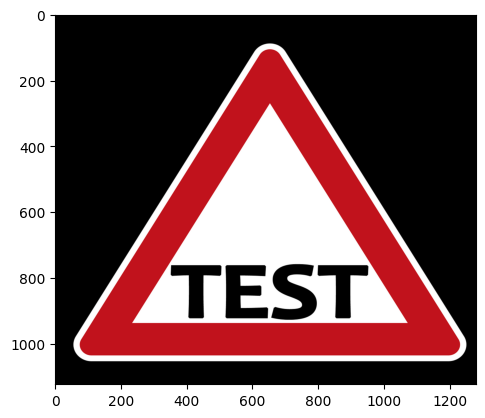

In [4]:
# because opencv uses bgr format, matplotlib use rgb, let us change the channel to rgb
# As you can see, the third element contains the color info for the single point
# Simply reverse the third element with [::-1]

img = img[:, :, ::-1] # keep the row and colunm unchanged
plt.imshow(img)

### Video

In [5]:
#download a mp4 file for test
with open('test.mp4', 'wb') as output:
    res = requests.get("https://file-examples.com/storage/fec6a8075a658242aaa283e/2017/04/file_example_MP4_480_1_5MG.mp4")
    output.write(res.content)



In [7]:
vc = cv2.VideoCapture('test.mp4')

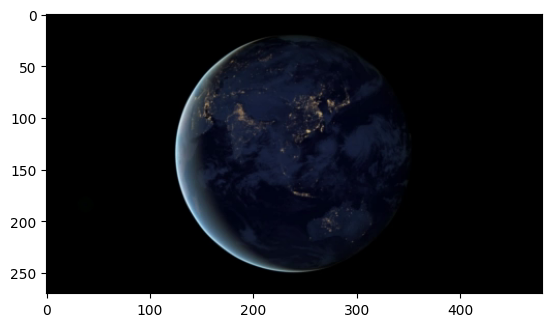

In [8]:
ret, frame = vc.read()
frame = frame[:,:,::-1]
plt.imshow(frame)

### Stream

In [9]:
stream_url = "https://cdn.flowplayer.com/a30bd6bc-f98b-47bc-abf5-97633d4faea0/hls/de3f6ca7-2db3-4689-8160-0f574a5996ad/playlist.m3u8"

In [10]:
vc = cv2.VideoCapture(stream_url)

In [11]:
result, frame = vc.read()

In [12]:
# skip the first 100 frames
for i in range(100): 
    result, frame = vc.read()

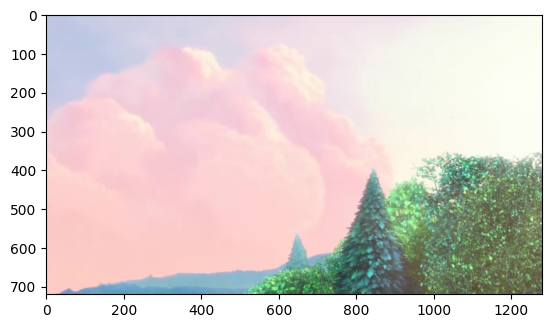

In [13]:
frame = frame[:,:,::-1]
plt.imshow(frame)

### appendix
let learn some basic image data process method

In [14]:
import numpy as np
test_data = [[[1,2,3], [1,2,3], [1,4,3]],
            [[4,5,6], [4,5,6], [4,4,6]],
            [[7,8,9], [7,8,9], [7,4,9]],
            ]
test_data = np.array(test_data)

#change the value
print('change the value order:', test_data[:,:, ::-1])
#change the row / column
print('change the row:', test_data[::-1,:, :])
print('change the column:', test_data[:, ::-1, :])

change the value order: [[[3 2 1]
  [3 2 1]
  [3 4 1]]

 [[6 5 4]
  [6 5 4]
  [6 4 4]]

 [[9 8 7]
  [9 8 7]
  [9 4 7]]]
change the row: [[[7 8 9]
  [7 8 9]
  [7 4 9]]

 [[4 5 6]
  [4 5 6]
  [4 4 6]]

 [[1 2 3]
  [1 2 3]
  [1 4 3]]]
change the column: [[[1 4 3]
  [1 2 3]
  [1 2 3]]

 [[4 4 6]
  [4 5 6]
  [4 5 6]]

 [[7 4 9]
  [7 8 9]
  [7 8 9]]]
